In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Files/Bank_Churn.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.shape

(10000, 14)

NumOfProducts: How many accounts, bank account affiliated products the person has

HasCrCard: Does the customer have a credit card through the bank

Exited: Did they leave the bank after all

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
for col in ['RowNumber','CustomerId','Surname','Geography']:
    df.drop(col,axis=1,inplace=True)

In [7]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)

In [11]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

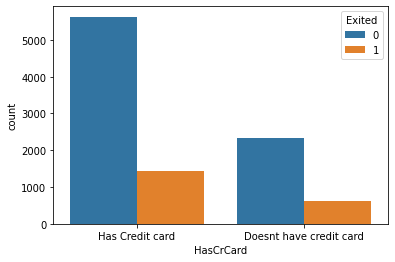

In [12]:
sns.countplot(x='HasCrCard',hue='Exited',data=df.replace({'HasCrCard':{1:"Has Credit card",0:"Doesnt have credit card"}}))

<AxesSubplot:xlabel='Gender', ylabel='count'>

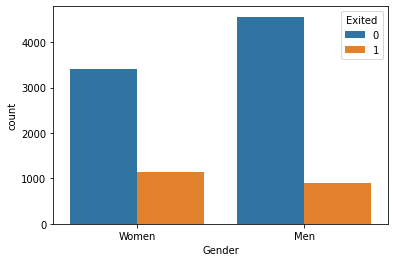

In [13]:
sns.countplot(x='Gender',hue='Exited',data=df.replace({"Gender":{1:"Men",0:"Women"}}))

<AxesSubplot:xlabel='Tenure', ylabel='count'>

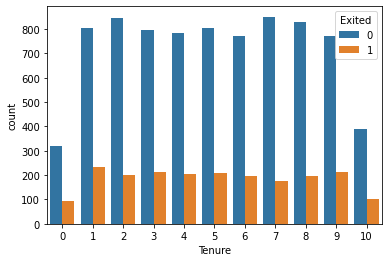

In [14]:
sns.countplot(x='Tenure',hue='Exited',data=df)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

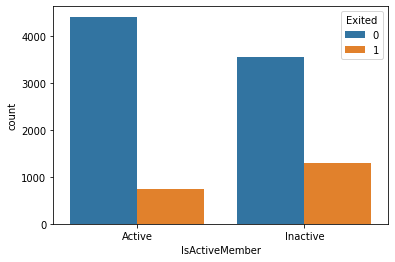

In [15]:
sns.countplot(x='IsActiveMember',hue='Exited',data=df.replace({"IsActiveMember":{1:"Active",0:"Inactive"}}))

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

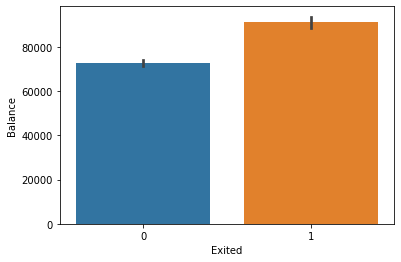

In [16]:
sns.barplot(x='Exited',y='Balance',data=df)

In [17]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.groupby('Exited').mean()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,
0,651.853196,0.572523,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,0.440844,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [19]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
X=df.drop("Exited",axis=1)
Y=df['Exited']

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,Y_train.shape)

(10000, 9) (8000, 9) (8000,)


### Without smote oversampling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8700,709,1,23,8,73314.04,2,1,0,63446.47
4438,672,1,68,0,126061.51,2,1,1,184936.77
4923,651,1,34,2,90355.12,2,0,0,193597.94
17,549,0,24,9,0.00,2,1,1,14406.41
5382,724,0,40,6,110054.45,1,1,1,86950.72
...,...,...,...,...,...,...,...,...,...
1751,541,1,29,7,127504.57,1,0,0,86173.92
8826,412,1,29,5,0.00,2,0,0,12510.53
1235,523,1,63,6,116227.27,1,1,1,119404.63
1286,579,1,37,5,152212.88,2,0,0,120219.14


In [25]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8
0,0.607219,0.915321,-1.520481,1.031665,-0.041438,0.794500,0.640654,-1.032012,-0.640035
1,0.223985,0.915321,2.763101,-1.738370,0.804155,0.794500,0.640654,0.968981,1.476135
2,0.006474,0.915321,-0.473383,-1.045862,0.231747,0.794500,-1.560906,-1.032012,1.626999
3,-1.050011,-1.092513,-1.425291,1.377920,-1.216732,0.794500,0.640654,0.968981,-1.494236
4,0.762585,-1.092513,0.097761,0.339156,0.547546,-0.910893,0.640654,0.968981,-0.230628
...,...,...,...,...,...,...,...,...,...
7995,-1.132872,0.915321,-0.949337,0.685411,0.827289,-0.910893,-1.560906,-1.032012,-0.244159
7996,-2.469014,0.915321,-0.949337,-0.007098,-1.216732,0.794500,-1.560906,-1.032012,-1.527260
7997,-1.319311,0.915321,2.287147,0.339156,0.646503,-0.910893,0.640654,0.968981,0.334668
7998,-0.739280,0.915321,-0.187811,-0.007098,1.223387,0.794500,-1.560906,-1.032012,0.348856


In [26]:
import tensorflow as tf 
from tensorflow import keras

In [27]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(9,)),
                          keras.layers.Dense(15, activation='relu'),
#                           keras.layers.Dense(12, activation='relu'),
                          keras.layers.Dense(10, activation='relu'),
#                           keras.layers.Dense(6, activation='relu'),
                          keras.layers.Dense(5, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=15)

Epoch 1/15
225/225 [==============================] - 2s 3ms/step - loss: 0.5861 - accuracy: 0.7068 - val_loss: 0.4435 - val_accuracy: 0.8138
Epoch 2/15
225/225 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8138 - val_loss: 0.4089 - val_accuracy: 0.8388
Epoch 3/15
225/225 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8401 - val_loss: 0.3819 - val_accuracy: 0.8512
Epoch 4/15
225/225 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8485 - val_loss: 0.3717 - val_accuracy: 0.8537
Epoch 5/15
225/225 [==============================] - 1s 3ms/step - loss: 0.3637 - accuracy: 0.8531 - val_loss: 0.3652 - val_accuracy: 0.8500
Epoch 6/15
225/225 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8524 - val_loss: 0.3623 - val_accuracy: 0.8575
Epoch 7/15
225/225 [==============================] - 1s 3ms/step - loss: 0.3548 - accuracy: 0.8535 - val_loss: 0.3644 - val_accuracy: 0.8500
Epoch 

In [28]:
model.evaluate(X_test_scaled, Y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8500


[0.3610646426677704, 0.8500000238418579]

In [29]:
Y_pred = model.predict(X_test_scaled)
Y_pred_labels = [np.argmax(i) for i in Y_pred]
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(Y_test,Y_pred_labels))

63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.73      0.42      0.53       407

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



Text(69.0, 0.5, 'Truth')

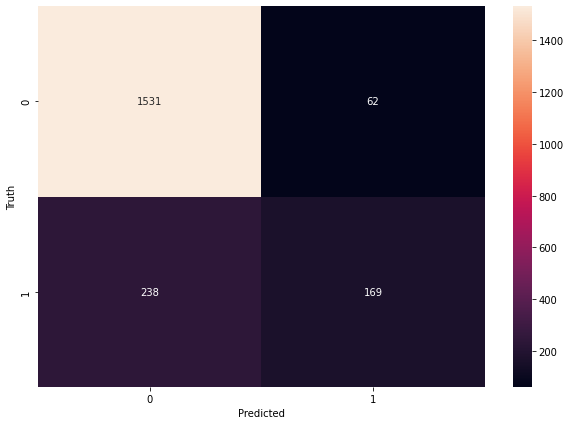

In [30]:
cm=confusion_matrix(Y_test,Y_pred_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Smote oversampling

In [31]:
X.shape,Y.shape

((10000, 9), (10000,))

In [32]:
Y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority')
X_sm, Y_sm = smote.fit_resample(X, Y)

Y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,stratify=Y_sm,random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [36]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(9,)),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(5, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
336/336 [==============================] - 1s 2ms/step - loss: 0.6120 - accuracy: 0.6850 - val_loss: 0.5092 - val_accuracy: 0.7782
Epoch 2/10
336/336 [==============================] - 1s 2ms/step - loss: 0.4798 - accuracy: 0.7790 - val_loss: 0.4778 - val_accuracy: 0.7908
Epoch 3/10
336/336 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.7905 - val_loss: 0.4579 - val_accuracy: 0.7992
Epoch 4/10
336/336 [==============================] - 1s 2ms/step - loss: 0.4395 - accuracy: 0.7976 - val_loss: 0.4470 - val_accuracy: 0.7967
Epoch 5/10
336/336 [==============================] - 1s 2ms/step - loss: 0.4279 - accuracy: 0.8039 - val_loss: 0.4303 - val_accuracy: 0.8017
Epoch 6/10
336/336 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.8075 - val_loss: 0.4267 - val_accuracy: 0.8025
Epoch 7/10
336/336 [==============================] - 1s 2ms/step - loss: 0.4143 - accuracy: 0.8077 - val_loss: 0.4208 - val_accuracy: 0.8033
Epoch 

In [37]:
model.evaluate(X_test_scaled, Y_test)

125/125 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8134


[0.4069691300392151, 0.8134103417396545]